In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as npy
import pylab as py

from scipy.io import netcdf
import scipy.signal as si
from mpl_toolkits.basemap import Basemap

from matplotlib.colors import LogNorm
%matplotlib inline

In [2]:
import sys
sys.path.append('/home/albert/python')
print(sys.path)


['', '/home/albert/anaconda2/lib/python2.7/site-packages/oocgcm-0.1.0-py2.7.egg', '/home/albert/anaconda2/lib/python2.7/site-packages/numpy-1.11.1-py2.7-linux-x86_64.egg', '/home/albert/anaconda2/lib/python27.zip', '/home/albert/anaconda2/lib/python2.7', '/home/albert/anaconda2/lib/python2.7/plat-linux2', '/home/albert/anaconda2/lib/python2.7/lib-tk', '/home/albert/anaconda2/lib/python2.7/lib-old', '/home/albert/anaconda2/lib/python2.7/lib-dynload', '/home/albert/anaconda2/lib/python2.7/site-packages/Sphinx-1.4.1-py2.7.egg', '/home/albert/anaconda2/lib/python2.7/site-packages/setuptools-23.0.0-py2.7.egg', '/home/albert/anaconda2/lib/python2.7/site-packages', '/home/albert/anaconda2/lib/python2.7/site-packages/IPython/extensions', '/home/albert/.ipython', '/home/albert/python']


In [3]:
import PyRaf_colormaps as raf
import matplotlib as mpl


In [6]:
fdir = "/home/albert/Data/precips/ALL_SEUILS/"

nwdfile1 = fdir + 'intens_GPCP-NCEPR1_interp_seuil01_mask.nc'
nwdfile2 = fdir + 'intens_TRMM-NCEPR1_interp_seuil01_mask.nc'
nwdfile3 = fdir + 'intens_NCEP-R1_seuil01_mask.nc'
nwdfile4 = fdir + 'intens_NCEP-R2_seuil01_mask.nc'
nwdfile5 = fdir + 'intens_MERRA-NCEPR1_interp_seuil01_mask.nc'
nwdfile6 = fdir + 'intens_CFSR-NCEPR1_interp_seuil01_mask.nc'
nwdfile7 = fdir + 'intens_ERAinterim-NCEPR1_interp_seuil01_mask.nc'


In [7]:
fnwd1 = netcdf.netcdf_file(nwdfile1,'r')
fnwd2 = netcdf.netcdf_file(nwdfile2,'r')
fnwd3 = netcdf.netcdf_file(nwdfile3,'r')
fnwd4 = netcdf.netcdf_file(nwdfile4,'r')
fnwd5 = netcdf.netcdf_file(nwdfile5,'r')
fnwd6 = netcdf.netcdf_file(nwdfile6,'r')
fnwd7 = netcdf.netcdf_file(nwdfile7,'r')


In [8]:
nwd1 = fnwd1.variables['intens']
nwd2 = fnwd2.variables['intens']
nwd3 = fnwd3.variables['intens']
nwd4 = fnwd4.variables['intens']
nwd5 = fnwd5.variables['intens']
nwd6 = fnwd6.variables['intens']
nwd7 = fnwd7.variables['intens']

lat1 = fnwd1.variables['lat']
lon1 = fnwd1.variables['lon']

In [9]:
lat1a=lat1[:]
lon1a=lon1[:]

nwd1a=nwd1[:]
nwd2a=nwd2[:]
nwd3a=nwd3[:]
nwd4a=nwd4[:]
nwd5a=nwd5[:]
nwd6a=nwd6[:]
nwd7a=nwd7[:]



In [10]:
lon2D1, lat2D1 = npy.meshgrid(lon1a, lat1a)


In [11]:
mask=npy.equal(nwd1a,0.)
nwd1a_ma=npy.ma.array(nwd1a,mask=mask)
nwd2a_ma=npy.ma.array(nwd2a,mask=mask)
nwd3a_ma=npy.ma.array(nwd3a,mask=mask)
nwd4a_ma=npy.ma.array(nwd4a,mask=mask)
nwd5a_ma=npy.ma.array(nwd5a,mask=mask)
nwd6a_ma=npy.ma.array(nwd6a,mask=mask)
nwd7a_ma=npy.ma.array(nwd7a,mask=mask)


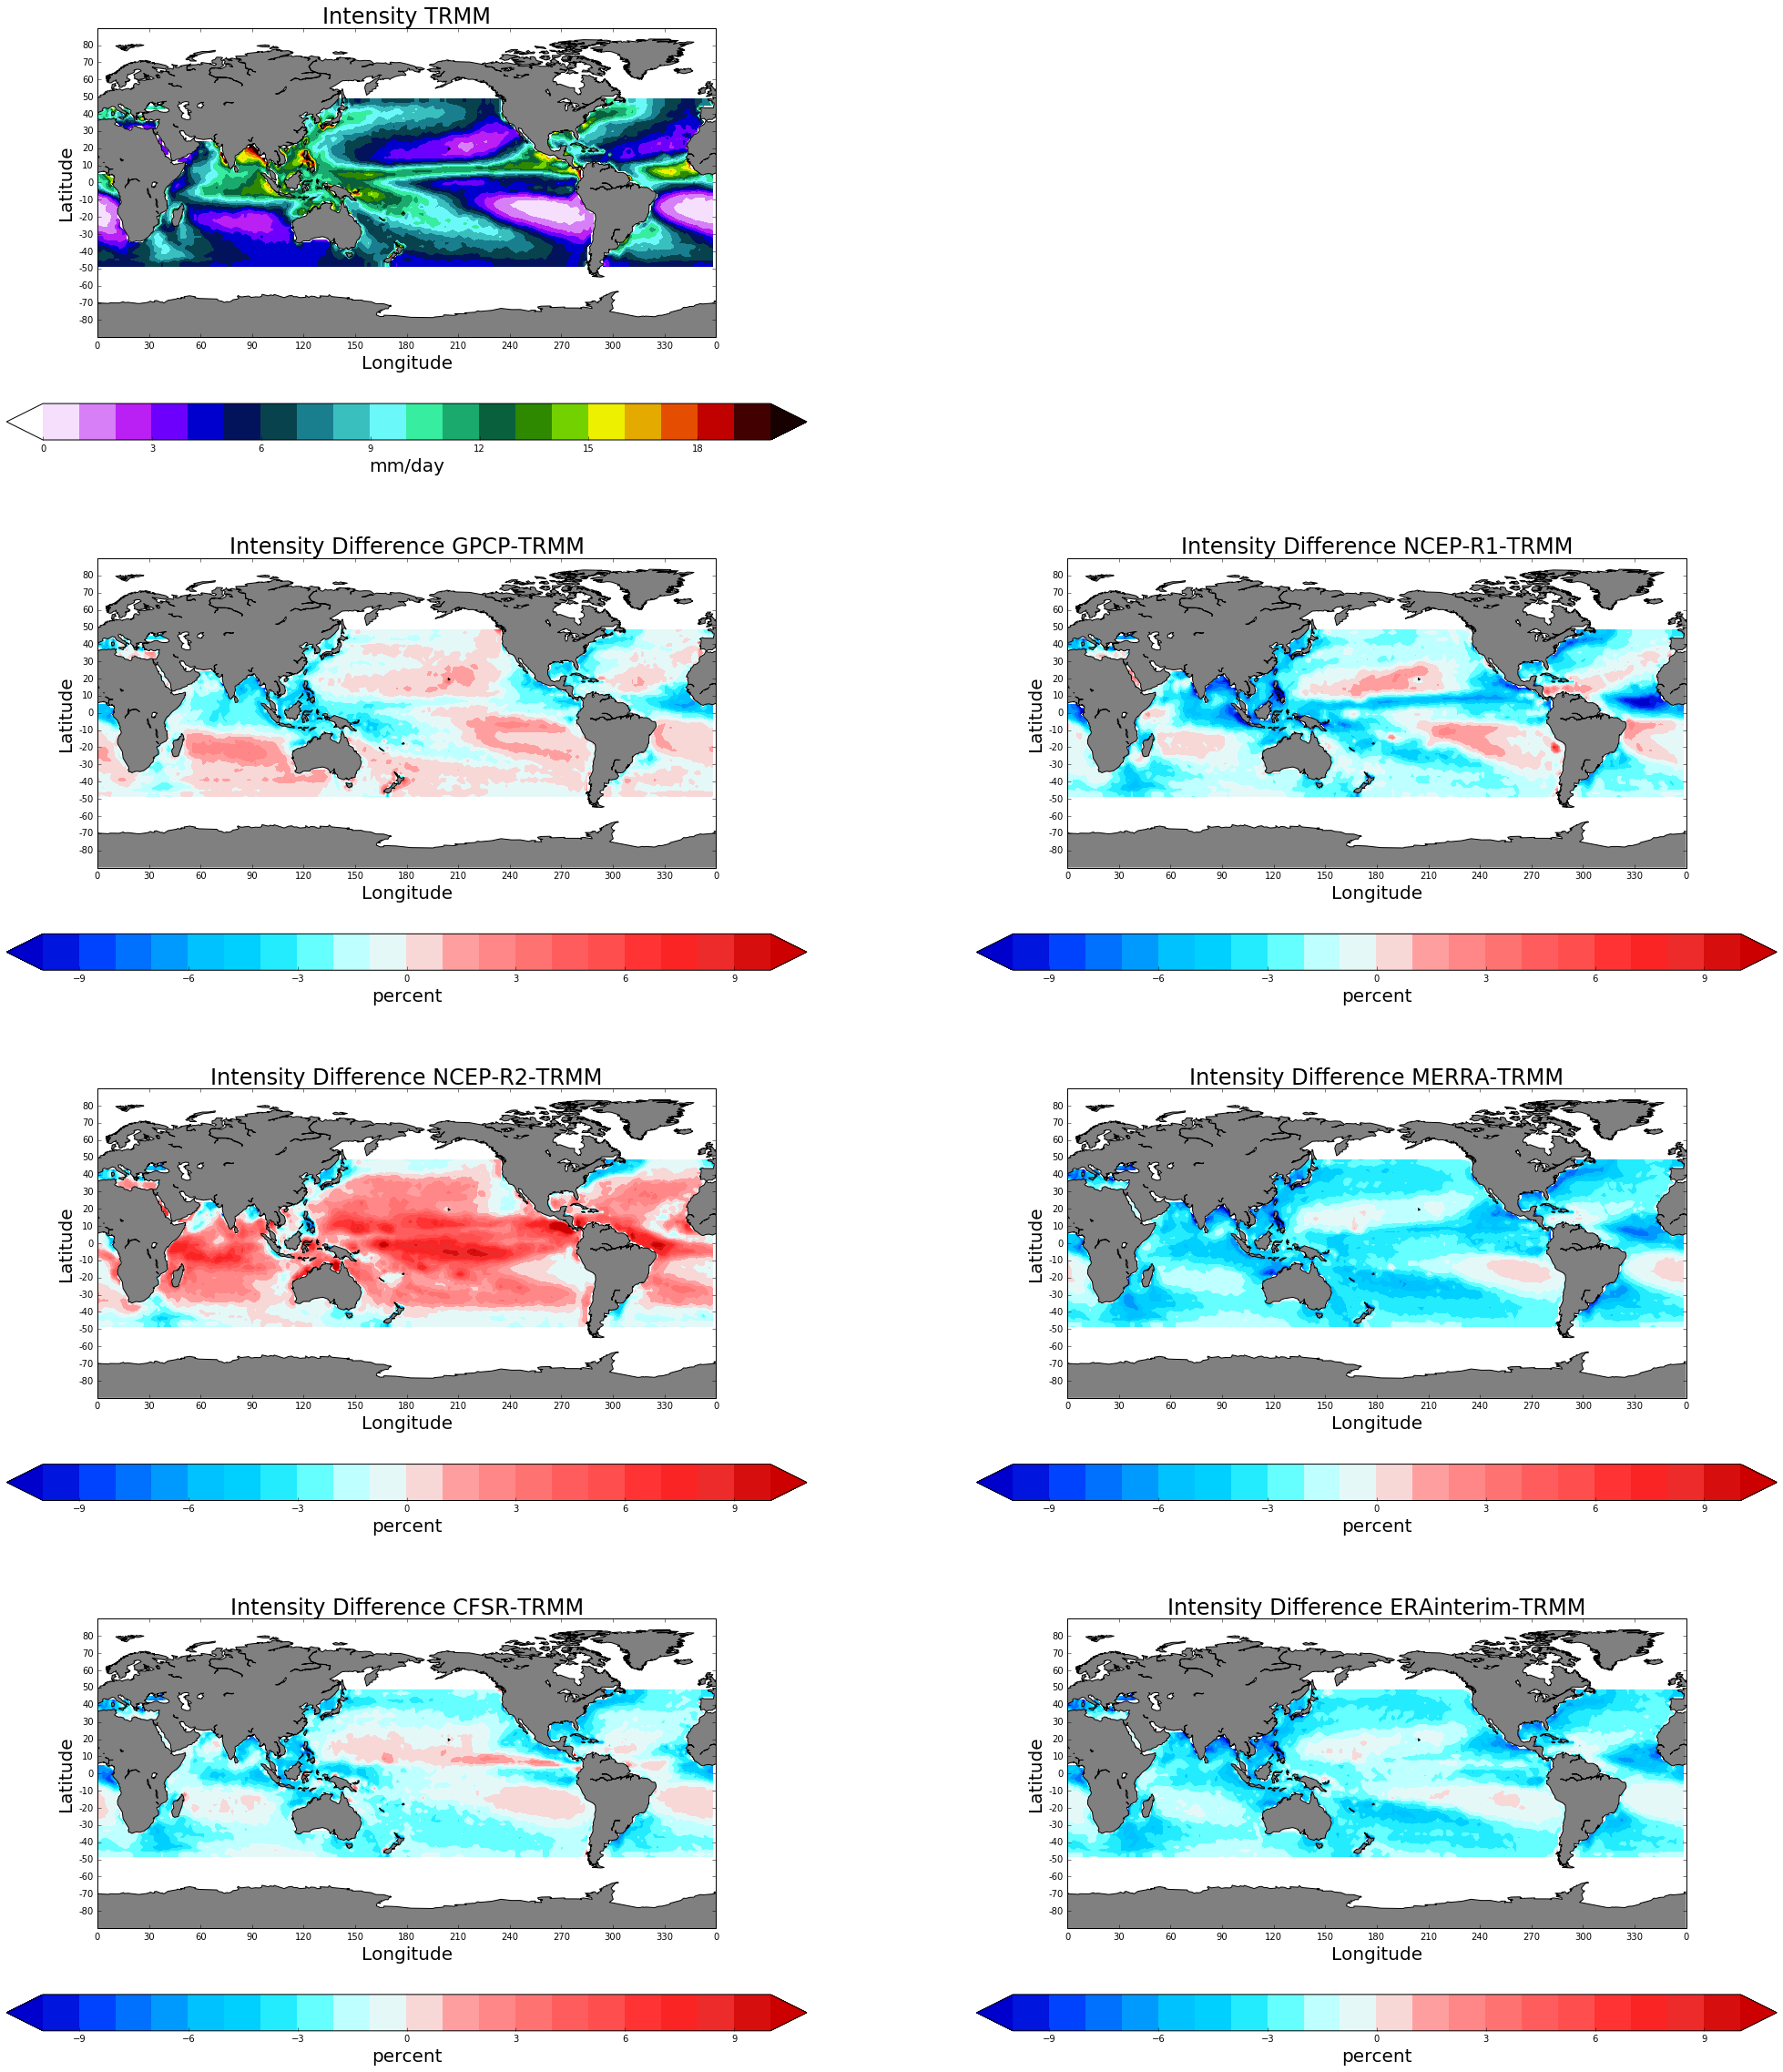

In [12]:
def map_anna1(lat,lon,nwd,title):
    m= Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
    llcrnrlon=0,urcrnrlon=360,resolution='c')
    m.contourf(lon,lat,nwd)
    m.drawcoastlines()
    limits=[0,20]
    norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
    pal = raf.gen_pal_Testu()
    contours = npy.arange(0,21,1)
    #C = m.contour(lon,lat,nwd,contours,linewidths=0.5,color='black')
    C = m.contourf(lon,lat,nwd,contours,cmap=pal,norm=norm,extend='both')
    m.fillcontinents(color='grey',lake_color='white')
    # colorbar      
    cbar = plt.colorbar(C,orientation='horizontal',shrink=0.99)
    plt.clim(limits[0],limits[1])
    cbar.set_label(r'mm/day',fontsize=20)
    # x axis
    locs, labels = plt.xticks()
    newlocs   = npy.array([0,30,60,90,120,150,180,210,240,270,300,330,360],'f')
    newlabels = npy.array([0,30,60,90,120,150,180,210,240,270,300,330,0],'i')
    plt.xticks(newlocs,newlabels)
    plt.xlabel('Longitude',fontsize=20)
    # y axis
    locsY,labelsy = plt.yticks()
    newlocsy   = npy.array([-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80],'f')
    newlabelsy = npy.array([-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80],'i')
    plt.yticks(newlocsy,newlabelsy)
    plt.ylabel('Latitude',fontsize=20) 
    # title
    plt.title(title,fontsize=24)
    
def map_anna2(lat,lon,nwd,title):
    m= Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
    llcrnrlon=0,urcrnrlon=360,resolution='c')
    m.contourf(lon,lat,nwd)
    m.drawcoastlines()
    limits=[-10,10]
    norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
    pal = raf.gen_pal_blue2red2()
    contours = npy.arange(-10,11,1)
    #C = m.contour(lon,lat,nwd,contours,linewidths=0.5,color='black')
    C = m.contourf(lon,lat,nwd,contours,cmap=pal,norm=norm,extend='both')
    m.fillcontinents(color='grey',lake_color='white')
    # colorbar      
    cbar = plt.colorbar(C,orientation='horizontal',shrink=0.99)
    plt.clim(limits[0],limits[1])
    cbar.set_label(r'percent',fontsize=20)
    # x axis
    locs, labels = plt.xticks()
    newlocs   = npy.array([0,30,60,90,120,150,180,210,240,270,300,330,360],'f')
    newlabels = npy.array([0,30,60,90,120,150,180,210,240,270,300,330,0],'i')
    plt.xticks(newlocs,newlabels)
    plt.xlabel('Longitude',fontsize=20)
    # y axis
    locsY,labelsy = plt.yticks()
    newlocsy   = npy.array([-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80],'f')
    newlabelsy = npy.array([-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80],'i')
    plt.yticks(newlocsy,newlabelsy)
    plt.ylabel('Latitude',fontsize=20) 
    # title
    plt.title(title,fontsize=24)
    

plt.figure(figsize=[35. , 40.])
plt.subplot(4,2,1)
map_anna1(lat2D1,lon2D1,nwd2a_ma[0],'Intensity TRMM')
plt.subplot(4,2,3)
map_anna2(lat2D1,lon2D1,nwd1a_ma[0]-nwd2a_ma[0],'Intensity Difference GPCP-TRMM')
plt.subplot(4,2,4)
map_anna2(lat2D1,lon2D1,nwd3a_ma[0]-nwd2a_ma[0],'Intensity Difference NCEP-R1-TRMM')
plt.subplot(4,2,5)
map_anna2(lat2D1,lon2D1,nwd4a_ma[0]-nwd2a_ma[0],'Intensity Difference NCEP-R2-TRMM')
plt.subplot(4,2,6)
map_anna2(lat2D1,lon2D1,nwd5a_ma[0]-nwd2a_ma[0],'Intensity Difference MERRA-TRMM')
plt.subplot(4,2,7)
map_anna2(lat2D1,lon2D1,nwd6a_ma[0]-nwd2a_ma[0],'Intensity Difference CFSR-TRMM')
plt.subplot(4,2,8)
map_anna2(lat2D1,lon2D1,nwd7a_ma[0]-nwd2a_ma[0],'Intensity Difference ERAinterim-TRMM')
plt.savefig('/home/albert/Data/precips/PLOTS/cartes_diff-TRMM_intens_interp-NCEP_ANNAlike.png')